<a href="https://colab.research.google.com/github/ajanaferreira/bootcampdataanalytics/blob/main/Exercicio_correlacao_regressao_janaina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#  Importações
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc
import re
import statsmodels.api as sm
from statsmodels.formula.api import ols

## Parte 1

In [ ]:
# Lendo e exibindo o arquivo
df_house = pd.read_csv('kc_house_data.csv')
df_house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,n,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,n,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,n,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,n,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,n,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             9999 non-null   int64  
 1   date           9999 non-null   object 
 2   price          9999 non-null   int64  
 3   bedrooms       9999 non-null   int64  
 4   bathrooms      9999 non-null   float64
 5   sqft_living    9999 non-null   int64  
 6   sqft_lot       9999 non-null   int64  
 7   floors         9999 non-null   float64
 8   waterfront     9999 non-null   object 
 9   view           9999 non-null   int64  
 10  condition      9999 non-null   int64  
 11  grade          9999 non-null   int64  
 12  sqft_above     9999 non-null   int64  
 13  sqft_basement  9999 non-null   int64  
 14  yr_built       9999 non-null   int64  
 15  yr_renovated   9999 non-null   int64  
 16  zipcode        9999 non-null   int64  
 17  lat            9999 non-null   float64
 18  long    

###1.a Codifique e exiba a matriz de correlação entre as variáveis numéricas.

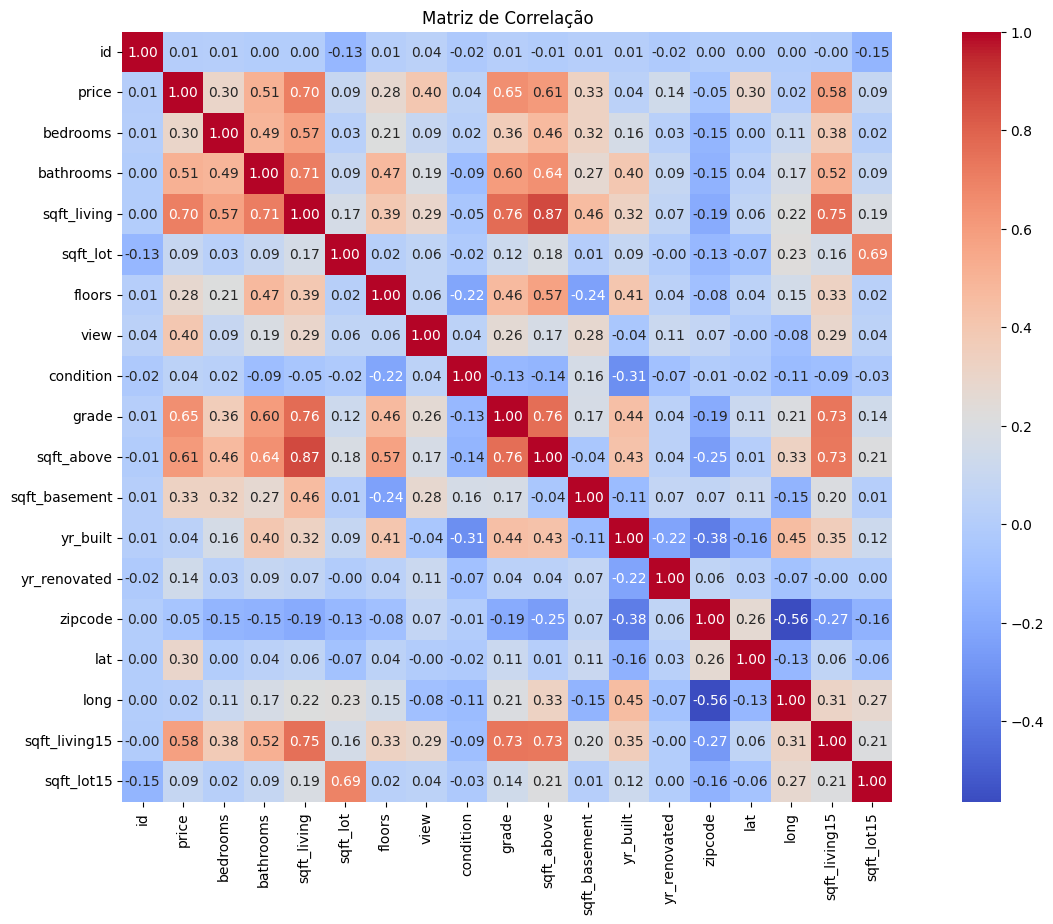

In [ ]:
# Calcular a matriz de correlação
df_numerico = df_house.select_dtypes(include=['number'])
matriz_corr = df_numerico.corr()
# Exibir a matriz de correlação como um gráfico de calor
plt.figure(figsize=(18, 10))
sns.heatmap(matriz_corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
plt.title('Matriz de Correlação')
plt.show()

###1.b Qual é a correlação entre o preço price e o número de quartos bedrooms?

In [ ]:
corr_bed_preco = df_house['price'].corr(df_house['bedrooms'])
print(f'A correlação entre o preço e o número de quartos é: {corr_bed_preco}')

A correlação entre o preço e o número de quartos é: 0.29920721616918206


###1.c Existe alguma diferença na correlação quando consideramos apenas casas com uma área total sqft_living superior a 2000 pés quadrados?

In [ ]:
def corr_doismil(df_house):
    # Filtrar as casas com área superior a 2000 pés quadrados
    casas_2000 = df_house[df_house['sqft_living'] > 2000]

    # Calcular a correlação entre preço e o número de quartos
    corr_2000_preco = casas_2000['price'].corr(casas_2000['bedrooms'])

    return corr_2000_preco

corr_2000_total = corr_doismil(df_house)
print(corr_2000_total)

0.11912115548964147


Sim, existe diferença quando consideramos apenas casas com uma área total sqft_living superior a 2000 pés quadrados

###2. Existe alguma correlação entre o preço price e a área total da casa sqft_living, considerando apenas casas com pelo menos dois banheiros bathrooms?


In [ ]:
def corr_preco_twobath(df_house):
    # Filtrar as casas com pelo menos 2 banheiros
    twobathrooms = df_house[df_house['bathrooms'] >= 2]

    # Calcular a correlação entre preço e a área total
    corr_p_living = twobathrooms['price'].corr(twobathrooms['sqft_living'])

    return corr_p_living

corr_living_total = corr_preco_twobath(df_house)
print(f'A correlação entre o preço e a área total da casa, considerando apenas casas com pelo menos dois banheiros é: {corr_living_total}')

A correlação entre o preço e a área total da casa, considerando apenas casas com pelo menos dois banheiros é: 0.7067107107996193


###3. Como a quantidade de banheiros bathrooms influencia na correlação entre a área total da casa sqft_living e o preço price?


In [ ]:
df_house.columns = df_house.columns.str.strip()  # Remove espaços em branco
df_house = df_house.reset_index(drop=True)

In [ ]:
df_house['bathrooms'] = df_house['bathrooms'].astype(int)

In [ ]:
# Exercicio 3

def corr_effect_bathroom_n(df_house, n_bath):
    df_bath_n = df_house[df_house['bathrooms'] == n_bath]  # Corrige para igualdade
    corr_price_sqft_living_bath_n = round(df_bath_n['price'].corr(df_bath_n['sqft_living']), 4)
    return corr_price_sqft_living_bath_n

for n_bath in range(0, df_house['bathrooms'].max() + 1):
    print(f'Correlação price x sqft_living para {n_bath} banheiros: {corr_effect_bathroom_n(df_house, n_bath)}')

Correlação price x sqft_living para 0 banheiros: 0.7857
Correlação price x sqft_living para 1 banheiros: 0.4599
Correlação price x sqft_living para 2 banheiros: 0.5695
Correlação price x sqft_living para 3 banheiros: 0.5945
Correlação price x sqft_living para 4 banheiros: 0.66
Correlação price x sqft_living para 5 banheiros: 0.7968
Correlação price x sqft_living para 6 banheiros: 0.4566
Correlação price x sqft_living para 7 banheiros: 1.0
Correlação price x sqft_living para 8 banheiros: nan


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


In [ ]:
#Exercicio 3 considerando todos os banheiros (2,5...)
def corr_effect_bathroom_n(df_house, n_bath):
  df_bath_n = df_house[df_house['bathrooms']>=n_bath]
  corr_price_sqft_living_bath_n = round(df_bath_n['price'].corr(df_bath_n['sqft_living']),4)
  return corr_price_sqft_living_bath_n
#depois fazemos um looping
for n_bath in range(0, df_house['bathrooms'].max() + 1):
  print(f'Correlação price x sqft_living para (n_bath) banheiros: {corr_effect_bathroom_n(df_house, n_bath)}')

Correlação price x sqft_living para (n_bath) banheiros: 0.7022
Correlação price x sqft_living para (n_bath) banheiros: 0.7018
Correlação price x sqft_living para (n_bath) banheiros: 0.7067
Correlação price x sqft_living para (n_bath) banheiros: 0.7159
Correlação price x sqft_living para (n_bath) banheiros: 0.7895
Correlação price x sqft_living para (n_bath) banheiros: 0.8389
Correlação price x sqft_living para (n_bath) banheiros: 0.8426
Correlação price x sqft_living para (n_bath) banheiros: 0.9869
Correlação price x sqft_living para (n_bath) banheiros: nan


###Vemos que quanto mais banheiros maior a correlação.

###4. Qual é a relação entre a condição da casa condition e o preço price,considerando apenas casas com uma área total sqft_living superior a 3000 pés quadrados?


In [ ]:
  def corr_preco(df_house):
    # Filtrar as casas com área total superior a 3000 pés quadrados
    casas_grandes = df_house[df_house['sqft_living'] > 3000]

    # Calcular a correlação entre condição da casa e preço
    corr_cpreco = casas_grandes['condition'].corr(casas_grandes['price'])

    return corr_cpreco

correlacao = corr_preco(df_house)
print(correlacao)

0.10527844723732609


###5. Existe alguma correlação entre a localização geográfica lat e long e preço price para casas com pelo menos três quartos bedrooms?

In [ ]:
# Exercicio 5

def correlacao_localizacao_preco(df_house):
    # Filtrar as casas com pelo menos três quartos
    quartos = df_house[df_house['bedrooms'] >= 3]

    # Calcular a correlação entre latitude e preço
    corr_lat = quartos['lat'].corr(quartos['price'])

    # Calcular a correlação entre longitude e preço
    corr_long = quartos['long'].corr(quartos['price'])

    return corr_lat, corr_long

corr_lat, corr_long = correlacao_localizacao_preco(df_house)
print(f"Correlação entre latitude e preço: {corr_lat}")
print(f"Correlação entre longitude e preço: {corr_long}")

Correlação entre latitude e preço: 0.31255514248432165
Correlação entre longitude e preço: -0.0072753069929269365


###6. Calcule a correlação entre uma variável categórica(waterfront) e uma variável numérica(price) usando ANOVA.

In [ ]:
# Exercicio 6
model = ols('price ~ C(waterfront)', data=df_house).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Exibir a tabela ANOVA
print(anova_table)

                     sum_sq      df           F         PR(>F)
C(waterfront)  1.250790e+14     1.0  964.573325  2.973808e-202
Residual       1.296339e+15  9997.0         NaN            NaN


## Parte 2

In [ ]:
#Lendo o arquivo
df_car = pd.read_csv('car_price.csv')
df_car.head(5)

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990,1680,1505,5,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995,1695,1555,5,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585,1595,1550,5,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995,1745,1510,5,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735,1830,1795,7,55.0


###7. Codifique e exiba a Matriz de correlação para as variáveis numéricas e dê exemplos de correlações positivas, negativas e neutras.


In [ ]:
corr_numerica = df_car.corr(numeric_only=True)
corr_numerica.style.background_gradient(cmap='coolwarm')

,Price,Year,Kilometer,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
Price,1.000000,0.309381,-0.147276,0.568875,0.577100,0.092968,-0.024879,0.586109
Year,0.309381,1.000000,-0.291740,0.085178,0.182220,0.126849,-0.000113,0.044859
Kilometer,-0.147276,-0.291740,1.000000,0.037817,0.008479,0.085728,0.111103,0.052447
Length,0.568875,0.085178,0.037817,1.000000,0.797228,0.194704,0.298527,0.809812
Width,0.577100,0.182220,0.008479,0.797228,1.000000,0.326928,0.229056,0.791316
Height,0.092968,0.126849,0.085728,0.194704,0.326928,1.000000,0.695373,0.408717
Seating Capacity,-0.024879,-0.000113,0.111103,0.298527,0.229056,0.695373,1.000000,0.313928
Fuel Tank Capacity,0.586109,0.044859,0.052447,0.809812,0.791316,0.408717,0.313928,1.000000


*Correlações*

Positivas

Length e Width: 0.797228


Length e Price: 0.568875


Fuel Tank Capacity e Price: 0.586109


Height e Seating Capacity: 0.695373



Negativas



Kilometer e Year: -0.291740


Price e Kilometer: -0.147276


Year e Kilometer: -0.291740



Neutras



Height e Kilometer: 0.085728


Year e Fuel Tank Capacity: 0.044859


Kilometer e Width: 0.008479

###8. Codifique e exiba Gráficos de Dispersão para cada uma das variáveis numéricas em relação à variável de interesse Price.


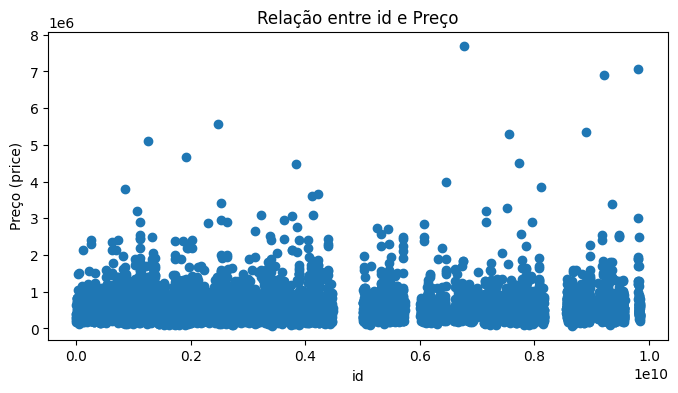

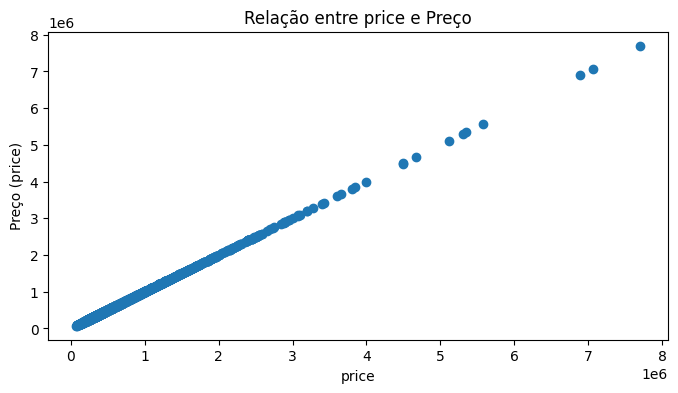

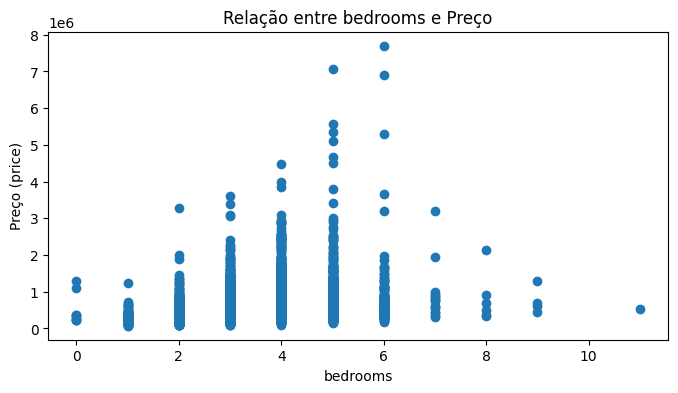

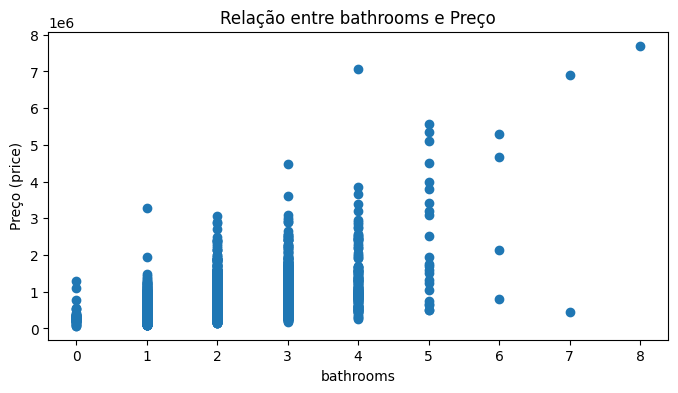

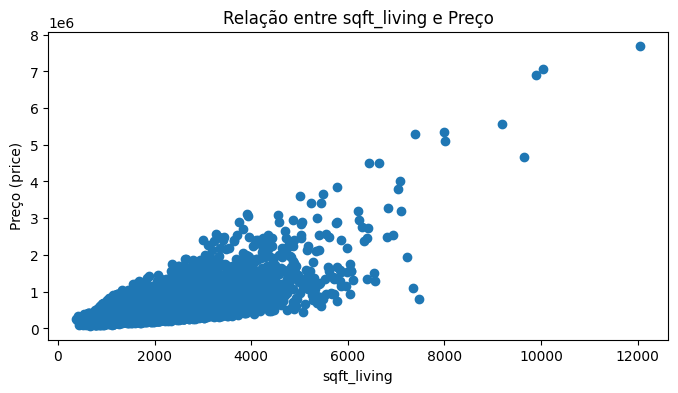

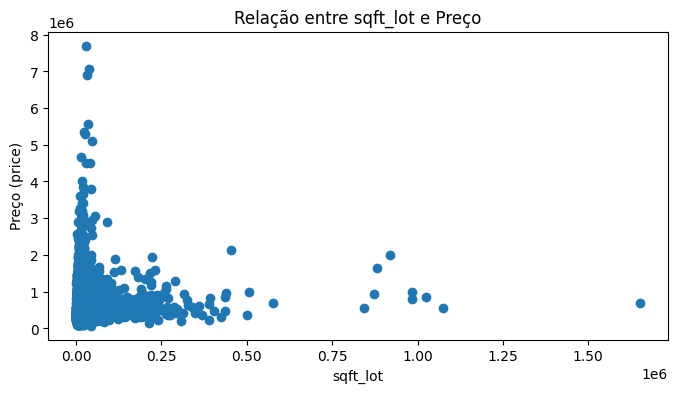

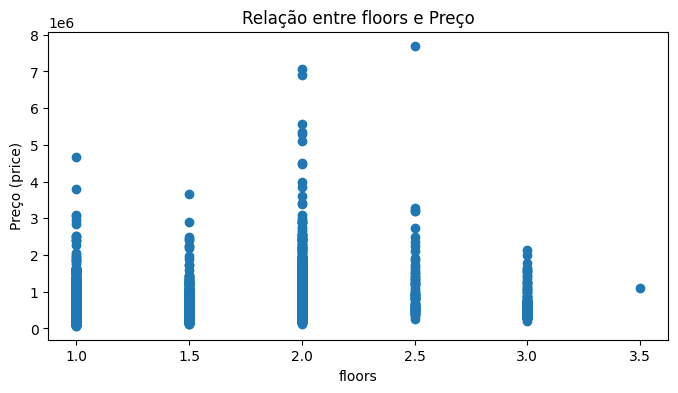

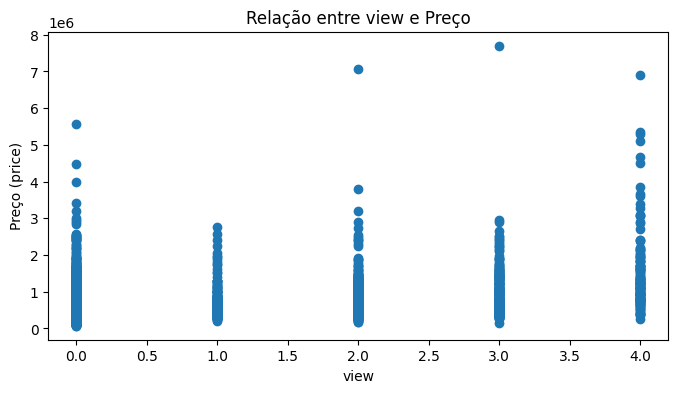

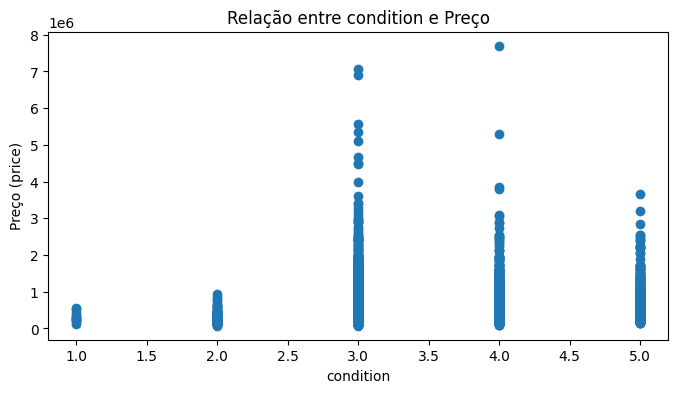

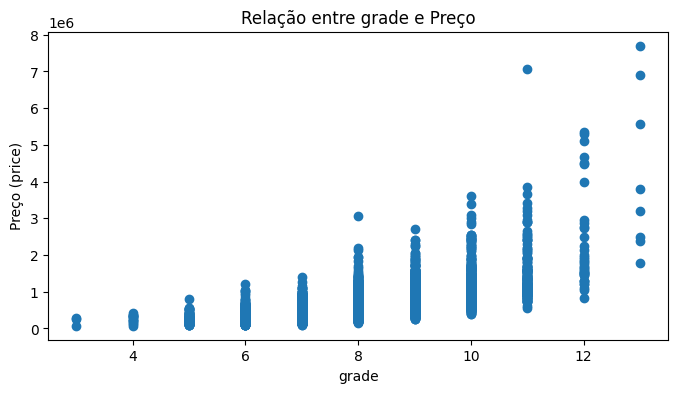

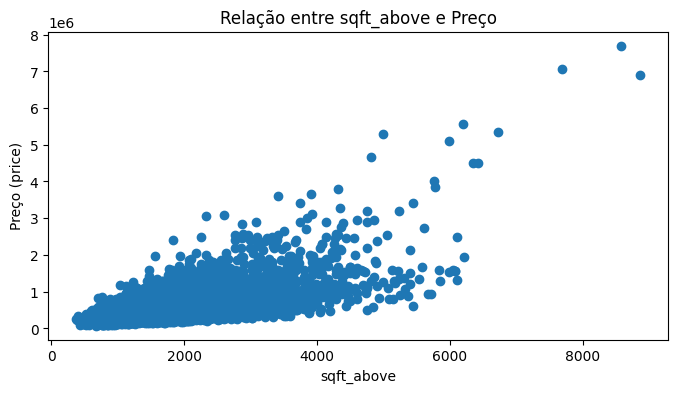

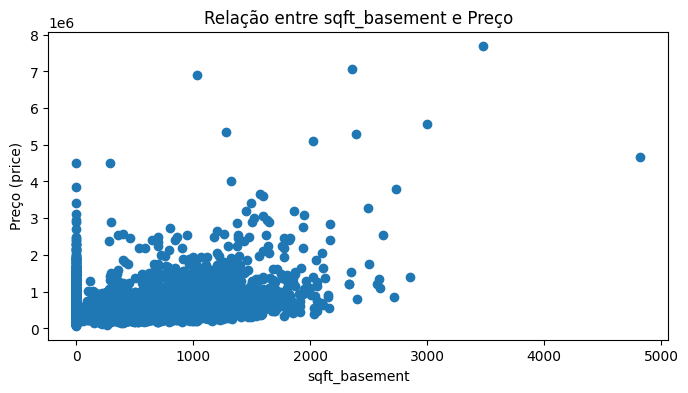

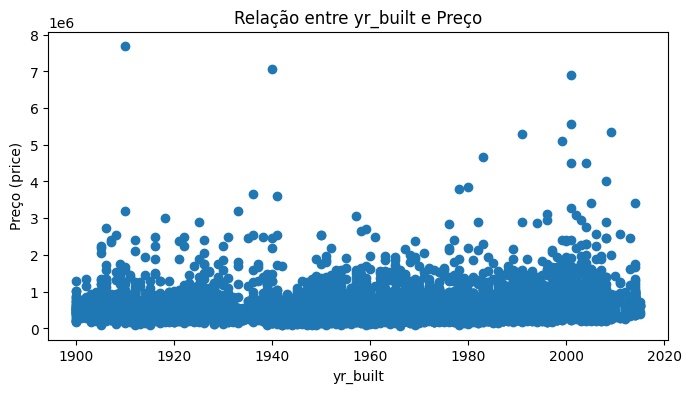

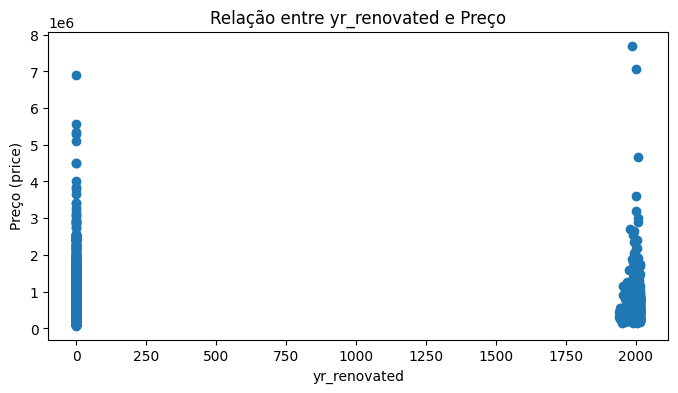

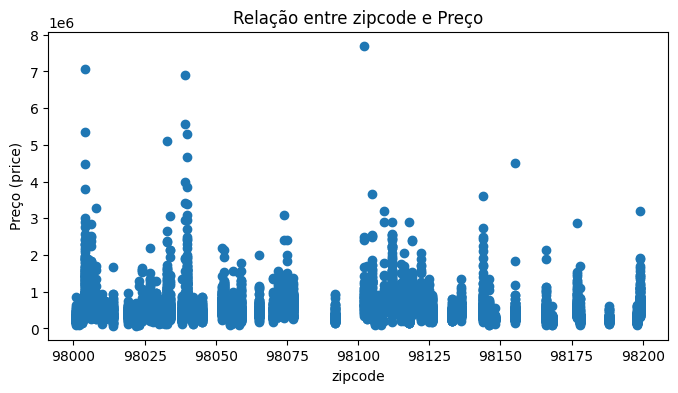

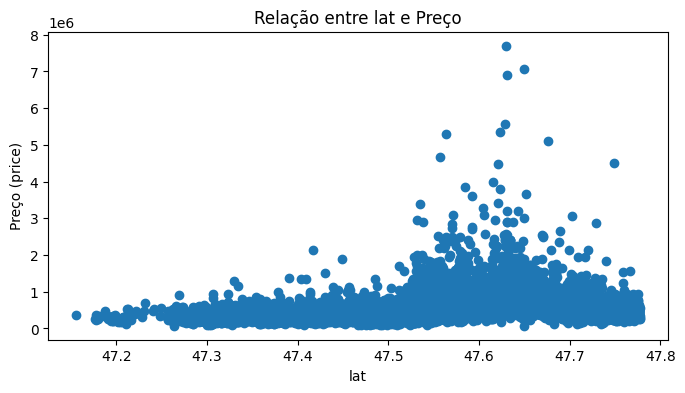

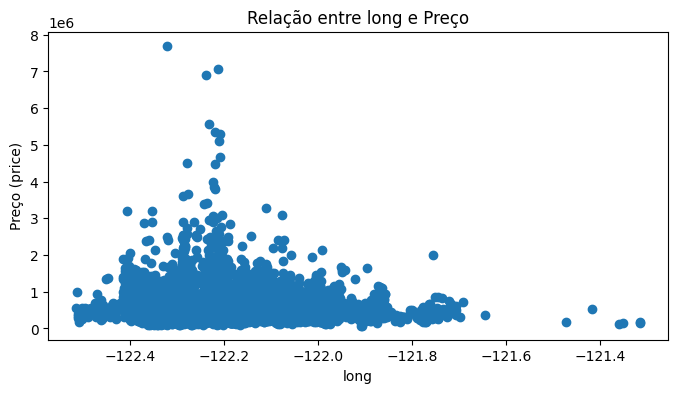

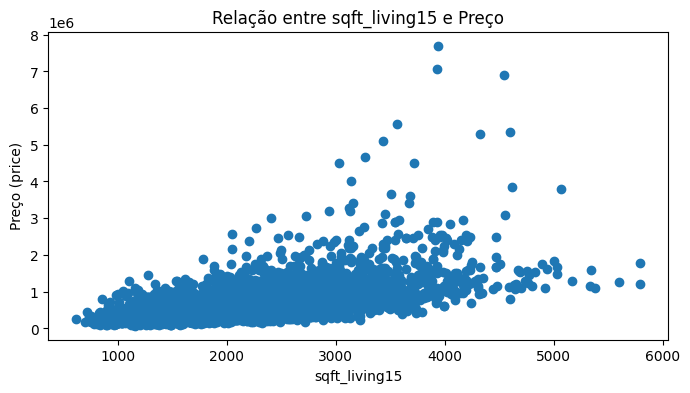

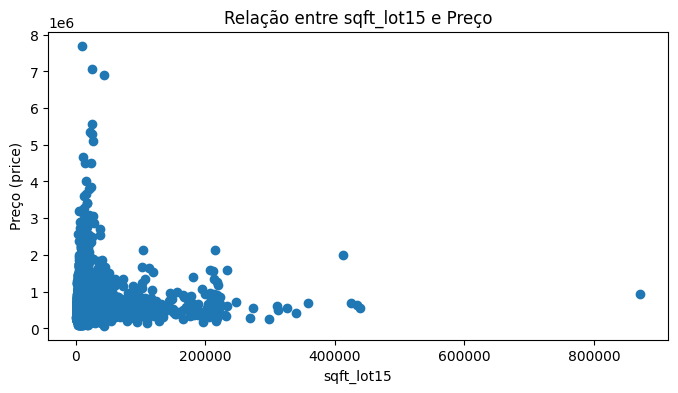

In [ ]:
for col in df_numerico:
  plt.figure(figsize=(8, 4))
  plt.scatter(df_numerico[col], df_numerico['price'])
  plt.xlabel(col)  # Nome do eixo x será o nome da coluna atual
  plt.ylabel('Preço (price)')  # Nome do eixo y
  plt.title(f'Relação entre {col} e Preço')
  plt.show()

###9. Crie um modelo de Regressão Linear Simples, exiba a Tabela de Regressão e exiba o plot da Reta Estimada.


In [ ]:
df_car['Max Power'] = df_car['Max Power'].str.extract(r'(\d+)')

# Converter para tipo numérico, se necessário
df_car['Max Power'] = pd.to_numeric(df_car['Max Power'])

# Verificar o resultado
print(df_car['Max Power'])

0        87
1        74
2        79
3        82
4       148
       ... 
1869     85
1870    138
1871     55
1872     70
1873    188
Name: Max Power, Length: 1874, dtype: int64


In [ ]:
# Exercicio 9
# Definir x e y
x = df_car['Max Power']
y = df_car['Price']

# Adicionar uma constante
x - sm.add_constant(x)

# Criar e ajustar o modelo
model = sm.OLS(y, x).fit()

# Imprimir o resumo do modelo
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.638
Model:                            OLS   Adj. R-squared (uncentered):              0.638
Method:                 Least Squares   F-statistic:                              3302.
Date:                Mon, 14 Oct 2024   Prob (F-statistic):                        0.00
Time:                        21:46:47   Log-Likelihood:                         -29639.
No. Observations:                1874   AIC:                                  5.928e+04
Df Residuals:                    1873   BIC:                                  5.928e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

<Axes: xlabel='Max Power', ylabel='Price'>

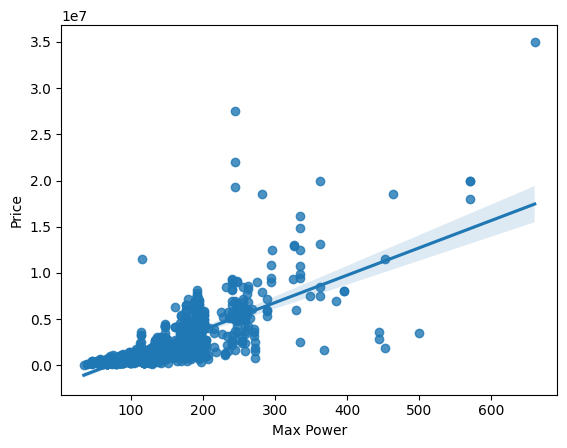

In [ ]:
#plotando a regrassao para uma variavel usando regplot
var = 'Max Power'
sns.regplot(x=var, y='Price', data=df_car)


###10. Codifique e exiba o gráfico dos resíduos do modelo de Regressão Simples.


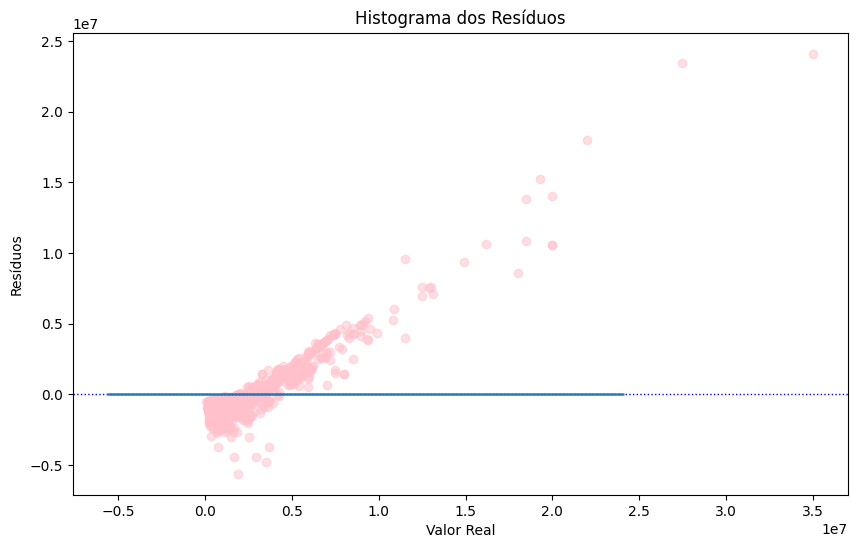

In [ ]:
#criar predição com x
y_pred = model.predict(x)
residuos = y - y_pred

#plotar os residuos num histograma
plt.figure(figsize=(10, 6))
plt.scatter(y, residuos, color='pink', alpha=0.5)
plt.axhline(y=0, color='blue', linestyle=':', lw=1)
plt.xlabel('Valor Real')
plt.ylabel('Resíduos')
sns.histplot(residuos, bins=20, kde=True)
plt.title('Histograma dos Resíduos')
plt.show()

In [ ]:
df_car.columns

Index(['Make', 'Model', 'Price', 'Year', 'Kilometer', 'Fuel Type',
       'Transmission', 'Location', 'Color', 'Owner', 'Seller Type', 'Engine',
       'Max Power', 'Max Torque', 'Drivetrain', 'Length', 'Width', 'Height',
       'Seating Capacity', 'Fuel Tank Capacity'],
      dtype='object')

###11. Crie um modelo de Regressão Multivariada, exiba a Tabela de Regressão e exiba o gráfico dos resíduos do modelo.

In [ ]:
numeric_columns = df_car.select_dtypes(include=['number']).columns.tolist()

In [ ]:
# Adicionar uma constante ao modelo
X = sm.add_constant(df_car[numeric_columns])
Y = df_car['Price']

In [ ]:
mv_model = sm.OLS(Y, X).fit()
print(mv_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.650e+29
Date:                Mon, 14 Oct 2024   Prob (F-statistic):               0.00
Time:                        21:57:23   Log-Likelihood:                 27830.
No. Observations:                1874   AIC:                        -5.564e+04
Df Residuals:                    1864   BIC:                        -5.559e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               7.666e-08   1.48

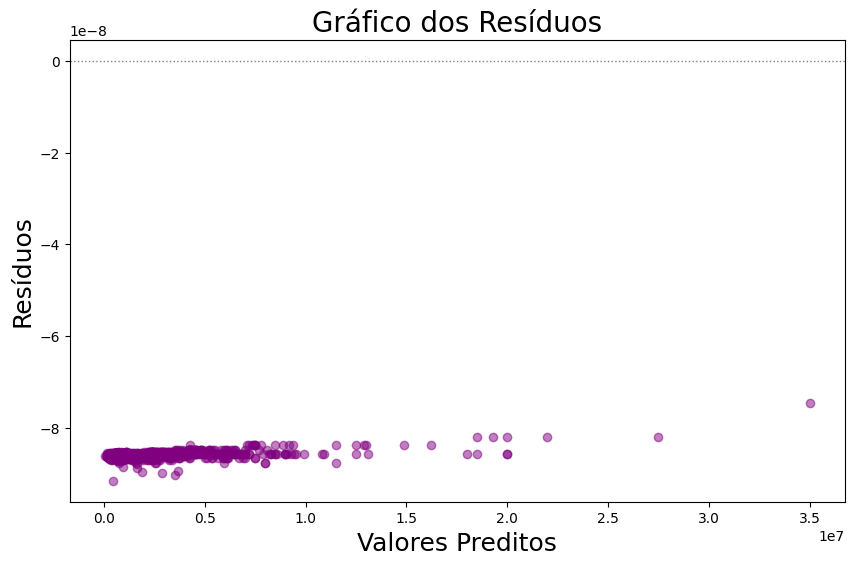

In [ ]:
# Calcular os valores preditos e os resíduos
y = mv_model.predict(X)
residuals = Y - y

# Plotar os resíduos
plt.figure(figsize=(10, 6))
plt.scatter(y, residuals, color='purple', alpha=0.5)
plt.axhline(y=0, color='grey', linestyle=':', lw=1)
plt.xlabel('Valores Preditos', fontsize=18)
plt.ylabel('Resíduos', fontsize=18)
plt.title('Gráfico dos Resíduos', fontsize=20)
plt.show()